# 7th Anomaly - Scaling in PCK
## 무기물과 같은 침전물이 관에 쌓이기 시작해 PCK의 압력이 증가하기 시작한다. 이는 관 내부에 침전물이 쌓이며 관의 지름이 줄어들기 시작한 상태에서 동일한 양의 유체가 들어오게 되어 관이 받는 압력이 증가하는 상황이다. 또한 온도는 점점 감소하기 시작하는데 이는 침전물에 의해서 센서가 점점 민감도를 잃기 시작하고 본래 측정해야 할 온도보다 더 낮게 측정하기 시작한다.

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Anomaly Detection/DataSet")
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/Anomaly Detection/DataSet'

In [7]:
# ▶ pd.set option
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)



# ▶ Data read
df = pd.read_csv("7/WELL-00018_20190403023307.csv")
df2 = pd.read_csv("7/WELL-00018_20180611021218.csv")
df3 = pd.read_csv("7/WELL-00006_20180620155728.csv")
df4 = pd.read_csv("7/WELL-00006_20180617181315.csv")
df5 = pd.read_csv("7/WELL-00001_20170226140146.csv")
df.head()

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,2019-04-03 02:33:07.000000,0.0,8431399.0,109.8564,1367659.0,73.72916,8810764.0,NaN,0.0,0.0
1,2019-04-03 02:33:08.000000,0.0,8431329.0,109.8558,1369236.0,73.72916,8810764.0,NaN,0.0,0.0
2,2019-04-03 02:33:09.000000,0.0,8431259.0,109.8553,1370814.0,73.72916,8810764.0,NaN,0.0,0.0
3,2019-04-03 02:33:10.000000,0.0,8431188.0,109.8548,1370814.0,73.72916,8810764.0,NaN,0.0,0.0
4,2019-04-03 02:33:11.000000,0.0,8431118.0,109.8543,1370814.0,73.72916,8810764.0,NaN,0.0,0.0


In [8]:
df.describe

<bound method NDFrame.describe of                         timestamp  P-PDG      P-TPT     T-TPT  P-MON-CKP  \
0      2019-04-03 02:33:07.000000    0.0  8431399.0  109.8564  1367659.0   
1      2019-04-03 02:33:08.000000    0.0  8431329.0  109.8558  1369236.0   
2      2019-04-03 02:33:09.000000    0.0  8431259.0  109.8553  1370814.0   
3      2019-04-03 02:33:10.000000    0.0  8431188.0  109.8548  1370814.0   
4      2019-04-03 02:33:11.000000    0.0  8431118.0  109.8543  1370814.0   
...                           ...    ...        ...       ...        ...   
44809  2019-04-03 14:59:56.000000    0.0  8489354.0  109.7213  1496222.0   
44810  2019-04-03 14:59:57.000000    0.0  8489349.0  109.7212  1495828.0   
44811  2019-04-03 14:59:58.000000    0.0  8489344.0  109.7210  1495433.0   
44812  2019-04-03 14:59:59.000000    0.0  8489338.0  109.7209  1495039.0   
44813  2019-04-03 15:00:00.000000    0.0  8489333.0  109.7207  1494645.0   

       T-JUS-CKP  P-JUS-CKGL  T-JUS-CKGL  QGL  class 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44814 entries, 0 to 44813
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   44814 non-null  object 
 1   P-PDG       44814 non-null  float64
 2   P-TPT       44814 non-null  float64
 3   T-TPT       44814 non-null  float64
 4   P-MON-CKP   44814 non-null  float64
 5   T-JUS-CKP   44814 non-null  float64
 6   P-JUS-CKGL  44814 non-null  float64
 7   T-JUS-CKGL  0 non-null      float64
 8   QGL         44814 non-null  float64
 9   class       44517 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.4+ MB


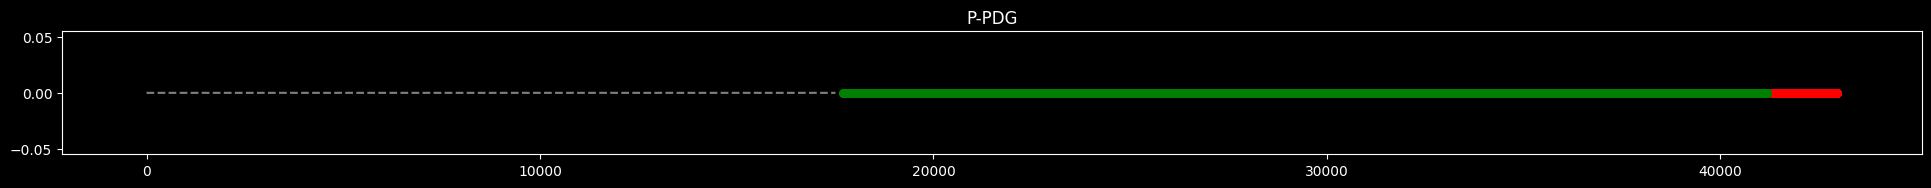

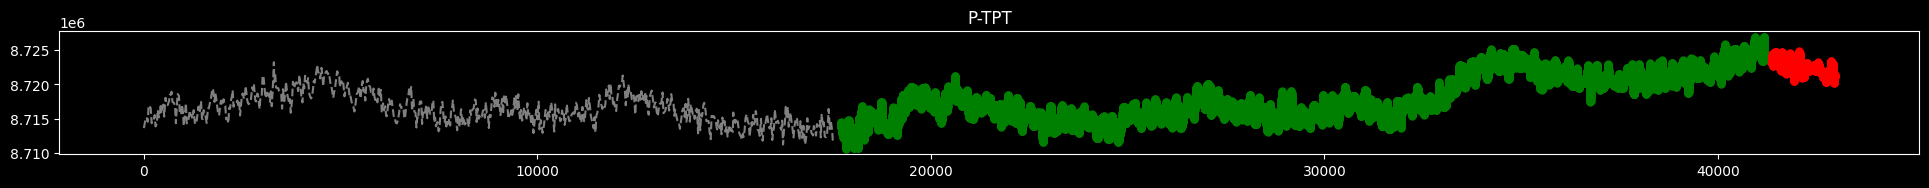

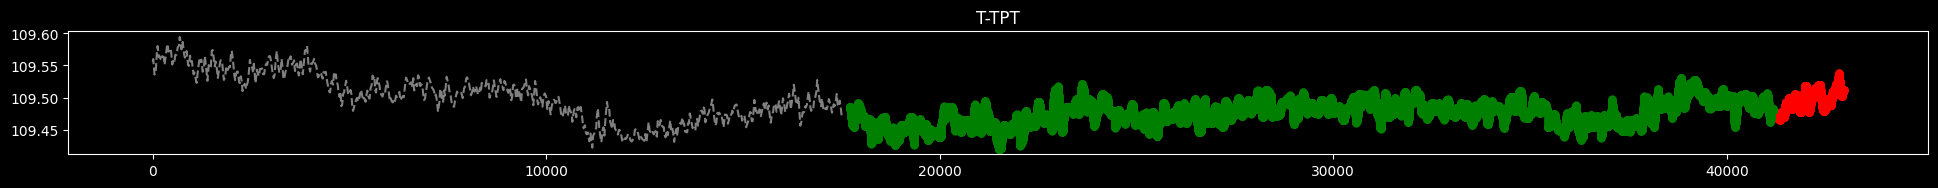

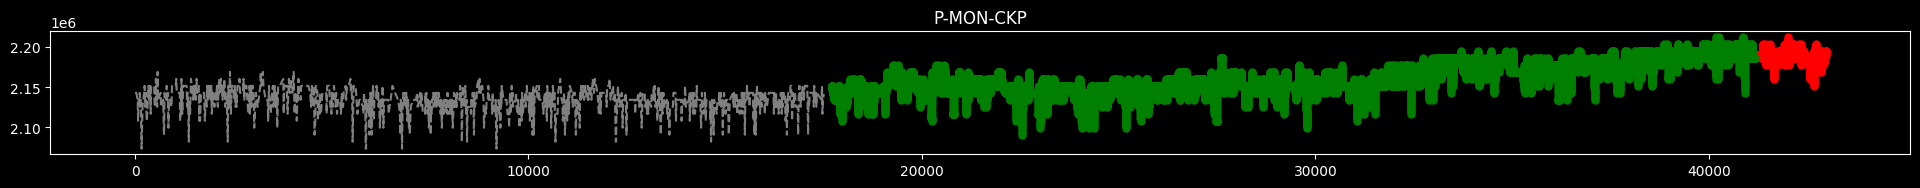

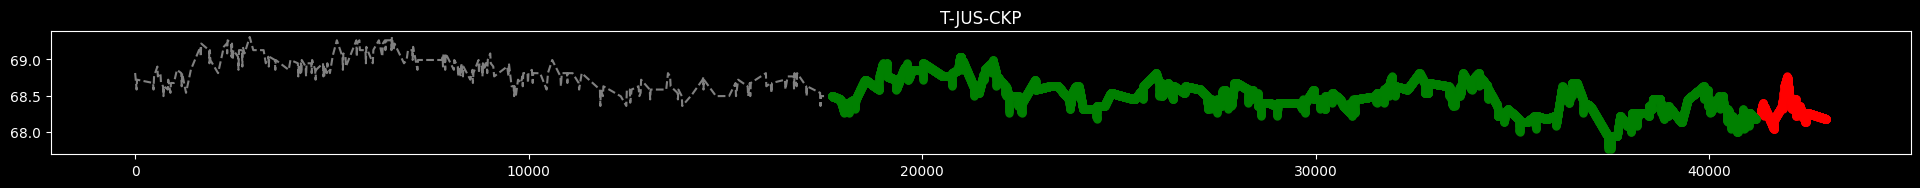

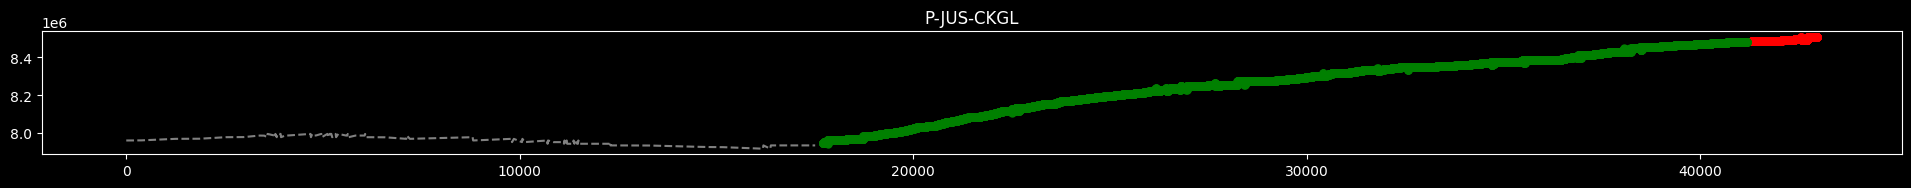

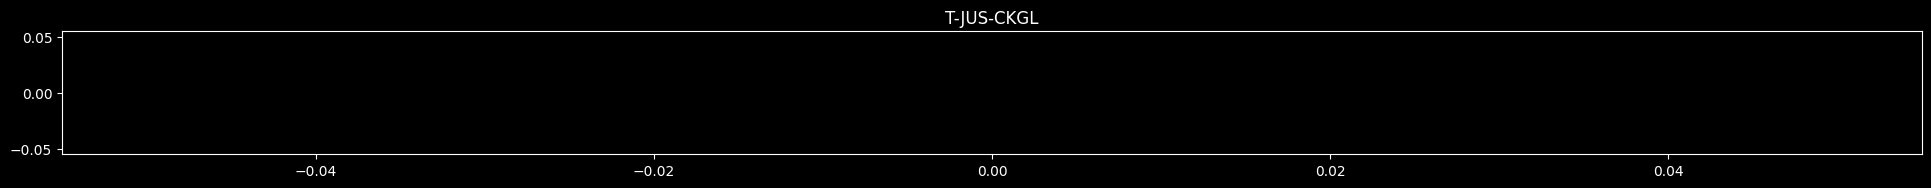

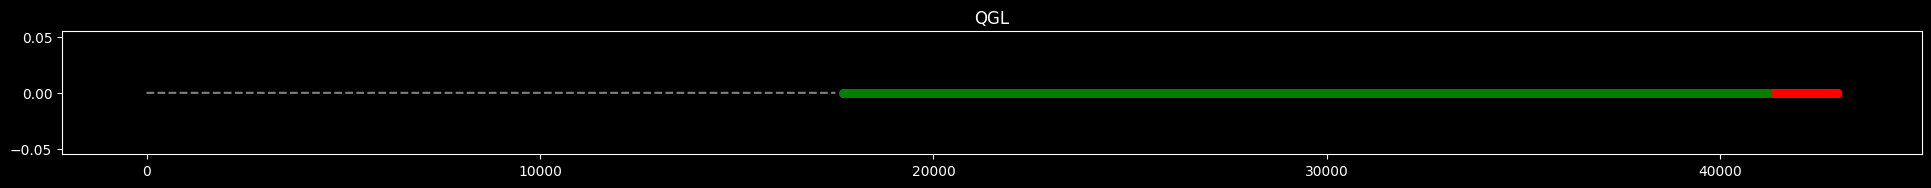

In [9]:
# ▶ for문 활용 시계열 센서 데이터 시각화

# ▶ data split
df_normal = df2[df2['class']==0.0]
df_change = df2[df2['class']==107]
df_anomaly  = df2[df2['class']==7]


for v, i in  enumerate(df.columns[1:9]) :
  plt.figure(figsize=(24,15))
  plt.subplot(8, 1, v+1)
  plt.plot(df_anomaly.index, df_anomaly[i], 'o', color='red', markersize=5);
  plt.plot(df_change.index, df_change[i], 'o', color='green', markersize=5);
  plt.plot(df_normal.index, df_normal[i], linestyle='--', color='grey');

  plt.title(i)

            P-PDG     P-TPT     T-TPT  P-MON-CKP  T-JUS-CKP  P-JUS-CKGL  \
P-PDG         NaN       NaN       NaN        NaN        NaN         NaN   
P-TPT         NaN  1.000000 -0.512416   0.676910  -0.415442    0.723586   
T-TPT         NaN -0.512416  1.000000  -0.621077   0.469188   -0.668797   
P-MON-CKP     NaN  0.676910 -0.621077   1.000000  -0.215980    0.764627   
T-JUS-CKP     NaN -0.415442  0.469188  -0.215980   1.000000   -0.456706   
P-JUS-CKGL    NaN  0.723586 -0.668797   0.764627  -0.456706    1.000000   
T-JUS-CKGL    NaN       NaN       NaN        NaN        NaN         NaN   
QGL           NaN       NaN       NaN        NaN        NaN         NaN   

            T-JUS-CKGL  QGL  
P-PDG              NaN  NaN  
P-TPT              NaN  NaN  
T-TPT              NaN  NaN  
P-MON-CKP          NaN  NaN  
T-JUS-CKP          NaN  NaN  
P-JUS-CKGL         NaN  NaN  
T-JUS-CKGL         NaN  NaN  
QGL                NaN  NaN  


<Axes: >

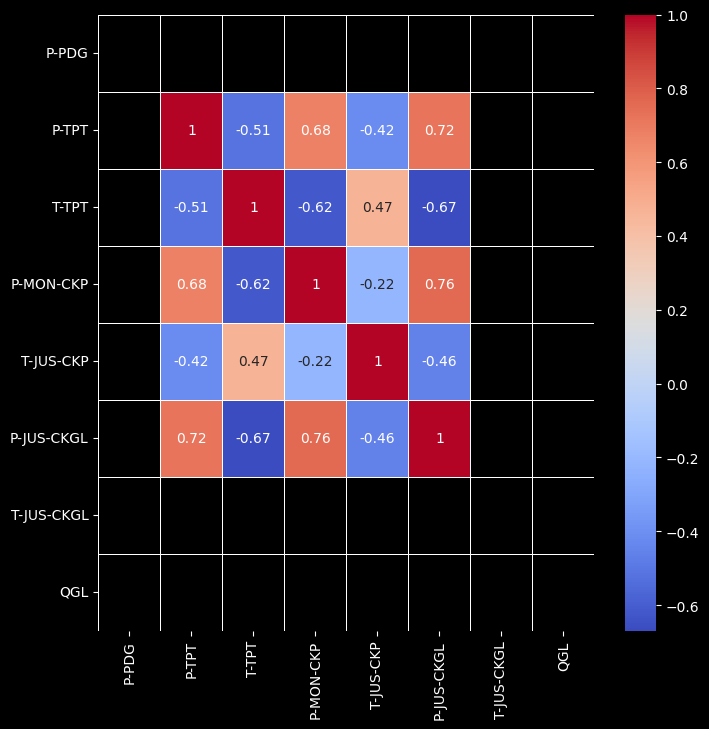

In [15]:
# ▶ 분석에 필요한 column만 선택
df_corr = df.iloc[:,1:-1]


# ▶ corr() 활용
fig = plt.figure(figsize=(8,8))
df_num = df_corr.corr()
print(df_num)
sns.heatmap(df_num, annot = True, cmap = 'coolwarm', linewidths=.5)

## EDA 결과
### P-PDG, QGL 등 일정하게 유지되는 컬럼이나 T-JUS-CKGL 같이 결측값으로 존재하는 컬럼 존재.
### 0.8 이상으로 측정되는 게 없기 때문에 상관관계가 높아보이는 컬럼은 존재하지 않는다고 판단함.
### 실제 사용하는 컬럼 P-TPT, T-TPT, P-MON-CKP, T-JUS-CKP, P-JUS-CKGL 5개 변수 사용 예정.